# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
city_names = []

# set up lists to hold reponse info
lat = []
lon = []
temp = []
humid = []
wind_speed = []
cloud = []
country = []
date = []
city_id = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        city_names.append(city)
        country.append(response['sys']['country'])
        date.append(response['dt'])
    
    
        print(city)
    except:
        print ("City Not Found")
        


    

    

sharjah
City Not Found
hermanus
mataura
shingu
ushuaia
nikolskoye
bluff
coquimbo
kaeo
kapaa
ponta do sol
atuona
necochea
hilo
bredasdorp
waingapu
tasiilaq
geraldton
kloulklubed
new norfolk
kruisfontein
rikitea
arraial do cabo
lunenburg
City Not Found
port lavaca
sebrovo
faanui
prince rupert
norman wells
sur
punta arenas
City Not Found
london
yellowknife
beyneu
City Not Found
vestmannaeyjar
avarua
tuktoyaktuk
miri
busselton
the valley
padang
City Not Found
thinadhoo
vaini
faya
saint-philippe
pimentel
casper
santa isabel
babusnica
pangnirtung
manitowoc
City Not Found
bambous virieux
port alfred
tiksi
kharp
santa maria
City Not Found
upernavik
hobart
puerto ayora
parana
sitka
formosa
cabo san lucas
dikson
luderitz
manokwari
smithers
xiropotamos
le port
wanning
kasongo-lunda
City Not Found
cape town
ahuimanu
zhangye
City Not Found
port elizabeth
cidreira
saint anthony
ios
City Not Found
mar del plata
albany
bonavista
aripuana
pekalongan
saint-pierre
isangel
vieques
City Not Found
bethel
su

In [5]:
print(city_names)

['sharjah', 'hermanus', 'mataura', 'shingu', 'ushuaia', 'nikolskoye', 'bluff', 'coquimbo', 'kaeo', 'kapaa', 'ponta do sol', 'atuona', 'necochea', 'hilo', 'bredasdorp', 'waingapu', 'tasiilaq', 'geraldton', 'kloulklubed', 'new norfolk', 'kruisfontein', 'rikitea', 'arraial do cabo', 'lunenburg', 'port lavaca', 'sebrovo', 'faanui', 'prince rupert', 'norman wells', 'sur', 'punta arenas', 'london', 'yellowknife', 'beyneu', 'vestmannaeyjar', 'avarua', 'tuktoyaktuk', 'miri', 'busselton', 'the valley', 'padang', 'thinadhoo', 'vaini', 'faya', 'saint-philippe', 'pimentel', 'casper', 'santa isabel', 'babusnica', 'pangnirtung', 'manitowoc', 'bambous virieux', 'port alfred', 'tiksi', 'kharp', 'santa maria', 'upernavik', 'hobart', 'puerto ayora', 'parana', 'sitka', 'formosa', 'cabo san lucas', 'dikson', 'luderitz', 'manokwari', 'smithers', 'xiropotamos', 'le port', 'wanning', 'kasongo-lunda', 'cape town', 'ahuimanu', 'zhangye', 'port elizabeth', 'cidreira', 'saint anthony', 'ios', 'mar del plata', 'a

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cities_df = pd.DataFrame({"City Name": city_names, "Country": country, "Longitude": lon, "Latitude": lat,
                          "Temperature": temp, "Humidity": humid, "Wind Speed": wind_speed, "Cloudiness": cloud,
                          "Date": date})
cities_df

,City Name,Country,Longitude,Latitude,Temperature,Humidity,Wind Speed,Cloudiness,Date
0,sharjah,AE,55.40,25.36,77.00,64,3.36,0,1603231306
1,hermanus,ZA,19.23,-34.42,46.00,91,2.84,0,1603231221
2,mataura,NZ,168.86,-46.19,53.01,69,7.00,36,1603231212
3,shingu,JP,135.98,33.73,61.27,76,9.46,39,1603231222
4,ushuaia,AR,-68.30,-54.80,44.60,68,13.87,75,1603231099
...,...,...,...,...,...,...,...,...,...
549,cruzeiro do sul,BR,-51.99,-29.51,73.00,78,7.61,20,1603231246
550,halifax,CA,-63.57,44.65,62.01,95,9.57,97,1603231261
551,san isidro,PE,-77.05,-12.12,68.00,68,6.93,47,1603231376
552,kholtoson,RU,103.31,50.30,21.42,80,2.35,72,1603231376


In [7]:
cities_df.to_csv("../starter_code/cities_data.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
humidity_df = cities_df.loc[cities_df['Humidity'] > 100]
humidity_df

,City Name,Country,Longitude,Latitude,Temperature,Humidity,Wind Speed,Cloudiness,Date


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

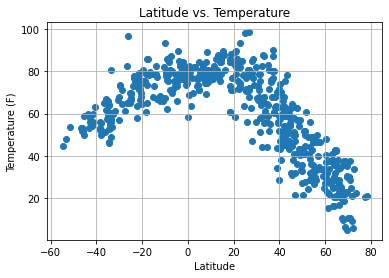

In [9]:
plt.scatter(cities_df['Latitude'], cities_df['Temperature'])
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Latitude vs. Temperature")
plt.grid()

plt.show()

## Latitude vs. Humidity Plot

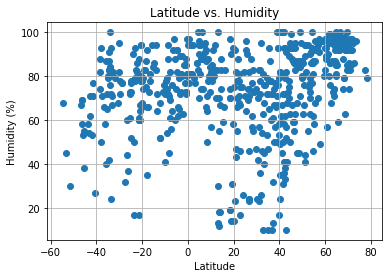

In [10]:
plt.scatter(cities_df['Latitude'], cities_df['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity")
plt.grid()

plt.show()

## Latitude vs. Cloudiness Plot

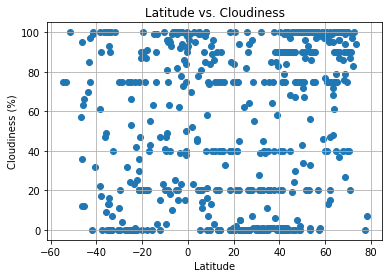

In [11]:
plt.scatter(cities_df['Latitude'], cities_df['Cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness")
plt.grid()

plt.show()

## Latitude vs. Wind Speed Plot

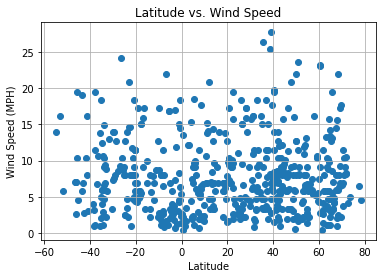

In [12]:
plt.scatter(cities_df['Latitude'], cities_df['Wind Speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title("Latitude vs. Wind Speed")
plt.grid()

plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

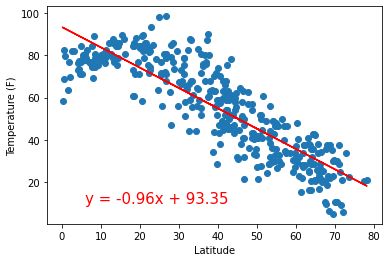

In [13]:
northern_hem = cities_df.loc[cities_df['Latitude'] >= 0]
x_values = northern_hem['Latitude']
y_values = northern_hem['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

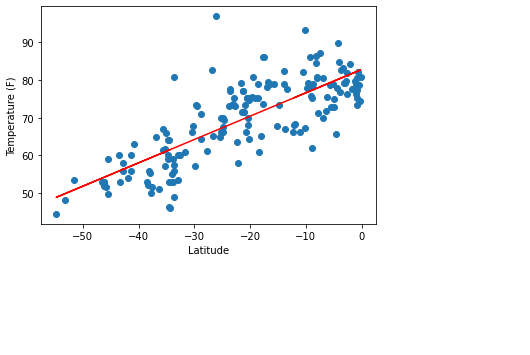

In [14]:
southern_hem = cities_df.loc[cities_df['Latitude'] <= 0]

x_values = southern_hem['Latitude']
y_values = southern_hem['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

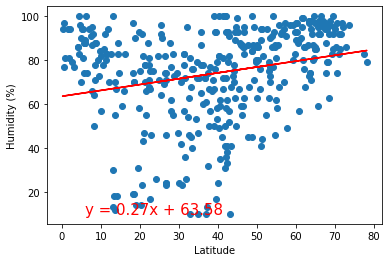

In [15]:
northern_hem = cities_df.loc[cities_df['Latitude'] >= 0]
x_values = northern_hem['Latitude']
y_values = northern_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

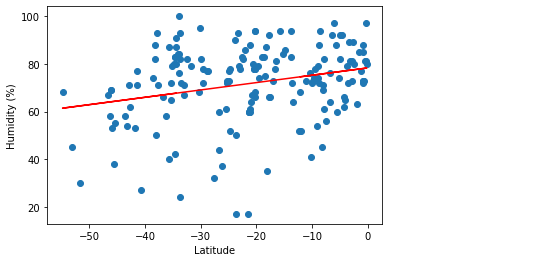

In [16]:
x_values = southern_hem['Latitude']
y_values = southern_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show() 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

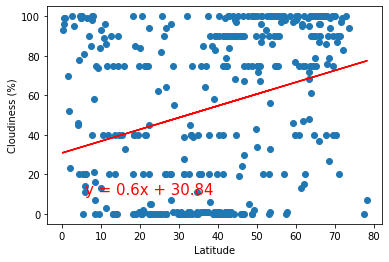

In [17]:
northern_hem = cities_df.loc[cities_df['Latitude'] >= 0]
x_values = northern_hem['Latitude']
y_values = northern_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

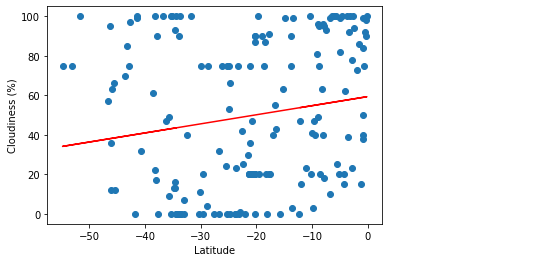

In [18]:
x_values = southern_hem['Latitude']
y_values = southern_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

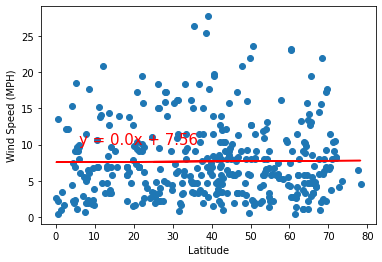

In [19]:
northern_hem = cities_df.loc[cities_df['Latitude'] >= 0]
x_values = northern_hem['Latitude']
y_values = northern_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

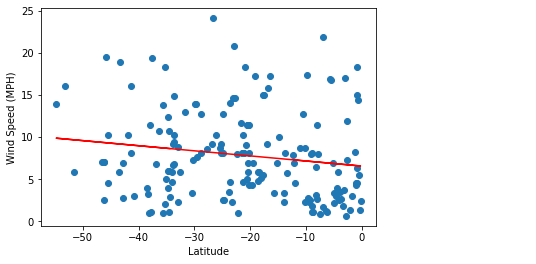

In [20]:
x_values = southern_hem['Latitude']
y_values = southern_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.show()